<a href="https://colab.research.google.com/github/simplyEmmanuel/Covid-19-Analysis-2023/blob/main/Supply_Chain_Disruption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Research Topic: Predictive Models and Advanced Technologies Mitigating Supply Chain Disruptions in the Retail Industry.**

# **Data Loading**

### Loading Supply Chain Dataset

In [ ]:
 # Install any missing libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Defining all the file paths
supply_chain_path = '/content/drive/MyDrive/Supply_Chain_Project/data.csv'
description_path = '/content/drive/MyDrive/Supply_Chain_Project/data_description.csv'
access_logs_path = '/content/drive/MyDrive/Supply_Chain_Project/tokenized_access_logs.csv'

# List of common encodings due to text data
encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']

# Loading CSV with different encodings
def load_csv_with_encodings(path, variable_name):
    for enc in encodings:
        try:
            print(f"Attempting to read {variable_name} with encoding: {enc}")
            df = pd.read_csv(path, encoding=enc)
            print(f"Successfully loaded {variable_name} with encoding: {enc}\n")
            return df
        except UnicodeDecodeError as e:
            print(f"Failed to load {variable_name} with encoding {enc}: {e}")
    print(f"Could not load {variable_name} with the tried encodings.\n")
    return None

# Load the structured data
supply_chain_df = load_csv_with_encodings(supply_chain_path, 'data.csv')
if supply_chain_df is not None:
    print("Structured Data (data.csv):")
    display(supply_chain_df.head())

# Load the description data
data_description_df = load_csv_with_encodings(description_path, 'data_description.csv')
if data_description_df is not None:
    print("Data Columns Description (data_description.csv):")
    display(data_description_df.head())

# Load the unstructured access logs
access_logs_df = load_csv_with_encodings(access_logs_path, 'tokenized_access_logs.csv')
if access_logs_df is not None:
    print("Unstructured Data (tokenized_access_logs.csv):")
    display(access_logs_df.head())


Attempting to read data.csv with encoding: utf-8
Failed to load data.csv with encoding utf-8: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte
Attempting to read data.csv with encoding: ISO-8859-1
Successfully loaded data.csv with encoding: ISO-8859-1

Structured Data (data.csv):


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Attempting to read data_description.csv with encoding: utf-8
Successfully loaded data_description.csv with encoding: utf-8

Data Columns Description (data_description.csv):


,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer


Attempting to read tokenized_access_logs.csv with encoding: utf-8
Successfully loaded tokenized_access_logs.csv with encoding: utf-8

Unstructured Data (tokenized_access_logs.csv):


,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


# **Initial Data Exploration and Understanding**

## ** Overview of the Datasets**

Before diving deep into analysis, it's essential to understand the structure and content of each dataset:

`Structured Data (supply_chain_df):`

**Records: 180,520**

**Columns: 53 **

Description: Contains detailed information about supply chain activities, including transaction types, shipping days, benefits, sales, delivery status, customer details, product information, and more.

`Data Columns Description (data_description_df):`
Description: Provides explanations for each column in the supply_chain_df dataset, helping you understand the meaning and context of each variable.

`Unstructured Data (access_logs_df):`

**Records: 469,978**

**Columns: 8**

Description: Contains tokenized access logs capturing user interactions, including product views, categories, timestamps, departments, IP addresses, and URLs.

## Data Cleaning and Preprocessing

## **Exploring the Structured Data (supply_chain_df)**

1. Understanding the Data Structure

In [ ]:
# Let's start by examining the structure of the supply_chain_df dataset.

# Displaying the first five rows
print("Structured Data (data.csv):")
display(supply_chain_df.head())

# Get information about data types and non-null counts
print("\nStructured Data Info:")
supply_chain_df.info()


Structured Data (data.csv):


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class



Structured Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Custome

2. Summary Statistics

Generating summary statistics provides a quick overview of numerical data distributions.

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(supply_chain_df.describe())



Summary Statistics:


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


3. Checking for Missing Values

Identifying missing values is essential for data cleaning.

In [ ]:
# Checking for missing values
print("\nMissing Values in Structured Data:")
print(supply_chain_df.isnull().sum())


Missing Values in Structured Data:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Mark

**Observations:**

Missing Values:
Product Description: All entries are NaN.
Order Zipcode: Approximately 13.7% missing (24840/180519).
Data Types:
Object Columns: Many categorical/string columns.
Numerical Columns: Days for shipping, benefit, sales, etc.

Summary Statistics
supply_chain_df.describe(), which provides statistical summaries for numerical columns. I would ensure to review this to understand the distribution, central tendencies, and variability.

Checking for Missing Values
From your output:

Customer Lname: 8 missing values
Order Zipcode: 155,679 missing values
Product Description: 180,519 missing values (all NaN)

In [ ]:
# 4. Handling missing value

# Dropping 'Product Description' as all values are NaN
if 'Product Description' in supply_chain_df.columns:
    supply_chain_df = supply_chain_df.drop('Product Description', axis=1)
    print("Dropped 'Product Description' column.")

# Check 'Order Zipcode' missing percentage
missing_zipcode = supply_chain_df['Order Zipcode'].isnull().sum() / len(supply_chain_df) * 100
print(f"Missing 'Order Zipcode': {missing_zipcode:.2f}%")

# Decide to drop or impute 'Order Zipcode'
if missing_zipcode > 10:
    # Example: Drop the column
    supply_chain_df = supply_chain_df.drop('Order Zipcode', axis=1)
    print("Dropped 'Order Zipcode' column due to high missingness.")
else:
    # Example: Impute with mode
    supply_chain_df['Order Zipcode'].fillna(supply_chain_df['Order Zipcode'].mode()[0], inplace=True)
    print("Imputed missing 'Order Zipcode' with mode.")

# Handle 'Customer Lname' missing values
missing_lname = supply_chain_df['Customer Lname'].isnull().sum()
print(f"Missing 'Customer Lname': {missing_lname}")

if missing_lname > 0:
    # Example: Fill with 'Unknown'
    supply_chain_df['Customer Lname'].fillna('Unknown', inplace=True)
    print("Imputed missing 'Customer Lname' with 'Unknown'.")


Dropped 'Product Description' column.
Missing 'Order Zipcode': 86.24%
Dropped 'Order Zipcode' column due to high missingness.
Missing 'Customer Lname': 8
Imputed missing 'Customer Lname' with 'Unknown'.


<ipython-input-9-e7d11ce342e3>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  supply_chain_df['Customer Lname'].fillna('Unknown', inplace=True)


In [ ]:
# Verifying missing values after handling
print("\nMissing Values After Handling:")
print(supply_chain_df.isnull().sum())


Missing Values After Handling:
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id      

## Data Type Conversions

Ensure that all columns have appropriate data types for analysis and modeling.

In [ ]:
# 1. Convert Date Columns:

# Converting 'order date (DateOrders)' and 'shipping date (DateOrders)' to datetime
supply_chain_df['order date (DateOrders)'] = pd.to_datetime(supply_chain_df['order date (DateOrders)'], errors='coerce')
supply_chain_df['shipping date (DateOrders)'] = pd.to_datetime(supply_chain_df['shipping date (DateOrders)'], errors='coerce')

# Verifying conversion
print("\nData Types After Conversion:")
print(supply_chain_df.dtypes)



Data Types After Conversion:
Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Email                           object
Customer Fname                           object
Customer Id                               int64
Customer Lname                           object
Customer Password                        object
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                        float64
Department

In [ ]:
# 2.Convert Categorical Columns:

# List of categorical columns
categorical_cols = [
    'Type', 'Delivery Status', 'Category Id', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname',
    'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street',
    'Department Id', 'Department Name', 'Market', 'Order City', 'Order Country',
    'Order Status', 'Product Card Id', 'Product Category Id', 'Product Name',
    'Product Status', 'Shipping Mode'
]

# Convert to 'category' dtype
for col in categorical_cols:
    if col in supply_chain_df.columns:
        supply_chain_df[col] = supply_chain_df[col].astype('category')

# Verify conversion
print("\nData Types After Categorical Conversion:")
print(supply_chain_df[categorical_cols].dtypes)





Data Types After Categorical Conversion:
Type                   category
Delivery Status        category
Category Id            category
Category Name          category
Customer City          category
Customer Country       category
Customer Email         category
Customer Fname         category
Customer Lname         category
Customer Password      category
Customer Segment       category
Customer State         category
Customer Street        category
Department Id          category
Department Name        category
Market                 category
Order City             category
Order Country          category
Order Status           category
Product Card Id        category
Product Category Id    category
Product Name           category
Product Status         category
Shipping Mode          category
dtype: object


2.2.8. Visualizing Key Variables

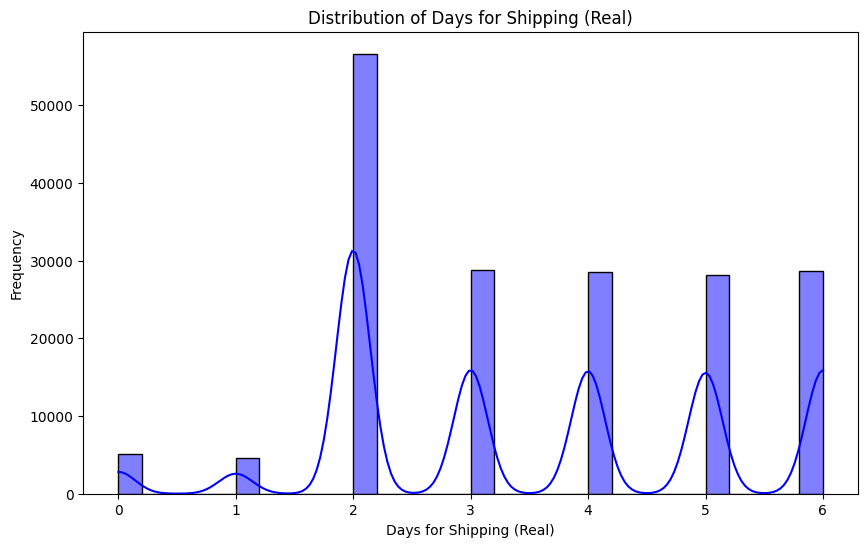

In [ ]:
# 1. Distribution of Days for Shipping (Real):

# Histogram for 'Days for shipping (real)'
plt.figure(figsize=(10,6))
sns.histplot(supply_chain_df['Days for shipping (real)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Days for Shipping (Real)')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')
plt.show()

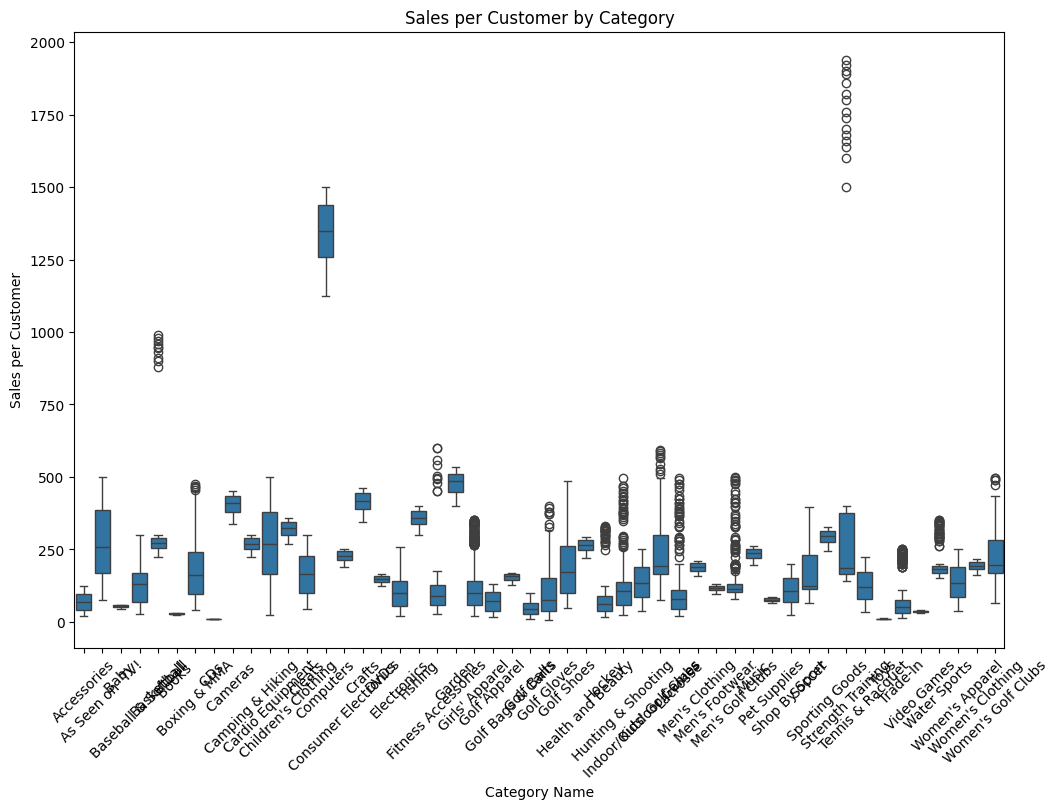

In [ ]:
# 2. Sales per Customer by Category:

# Boxplot for 'Sales per customer' by 'Category Name'
plt.figure(figsize=(12,8))
sns.boxplot(x='Category Name', y='Sales per customer', data=supply_chain_df)
plt.title('Sales per Customer by Category')
plt.xlabel('Category Name')
plt.ylabel('Sales per Customer')
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-b9ffa6d439a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delivery Status', data=supply_chain_df, palette='viridis')


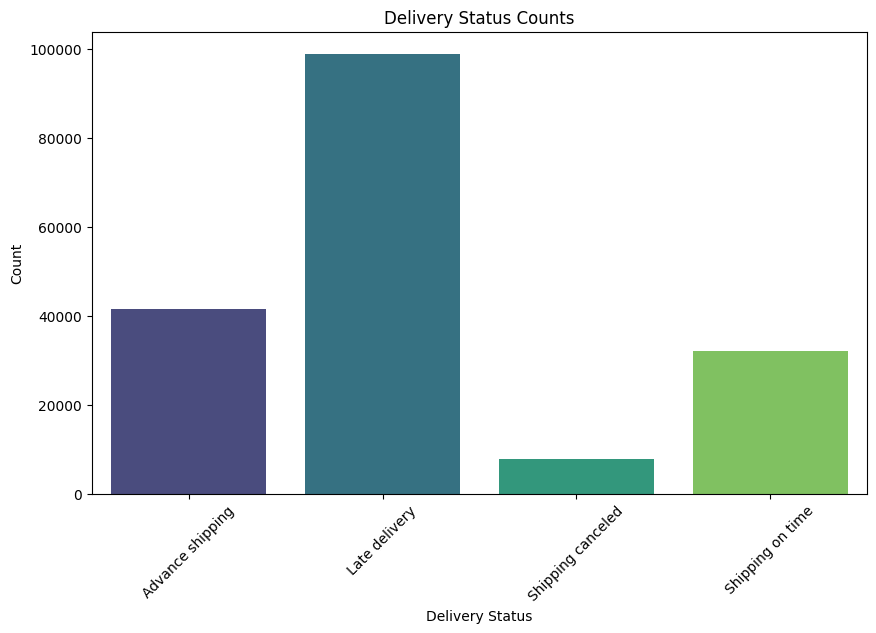

In [ ]:
# 3. Delivery Status Counts

# Countplot for 'Delivery Status'
plt.figure(figsize=(10,6))
sns.countplot(x='Delivery Status', data=supply_chain_df, palette='viridis')
plt.title('Delivery Status Counts')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

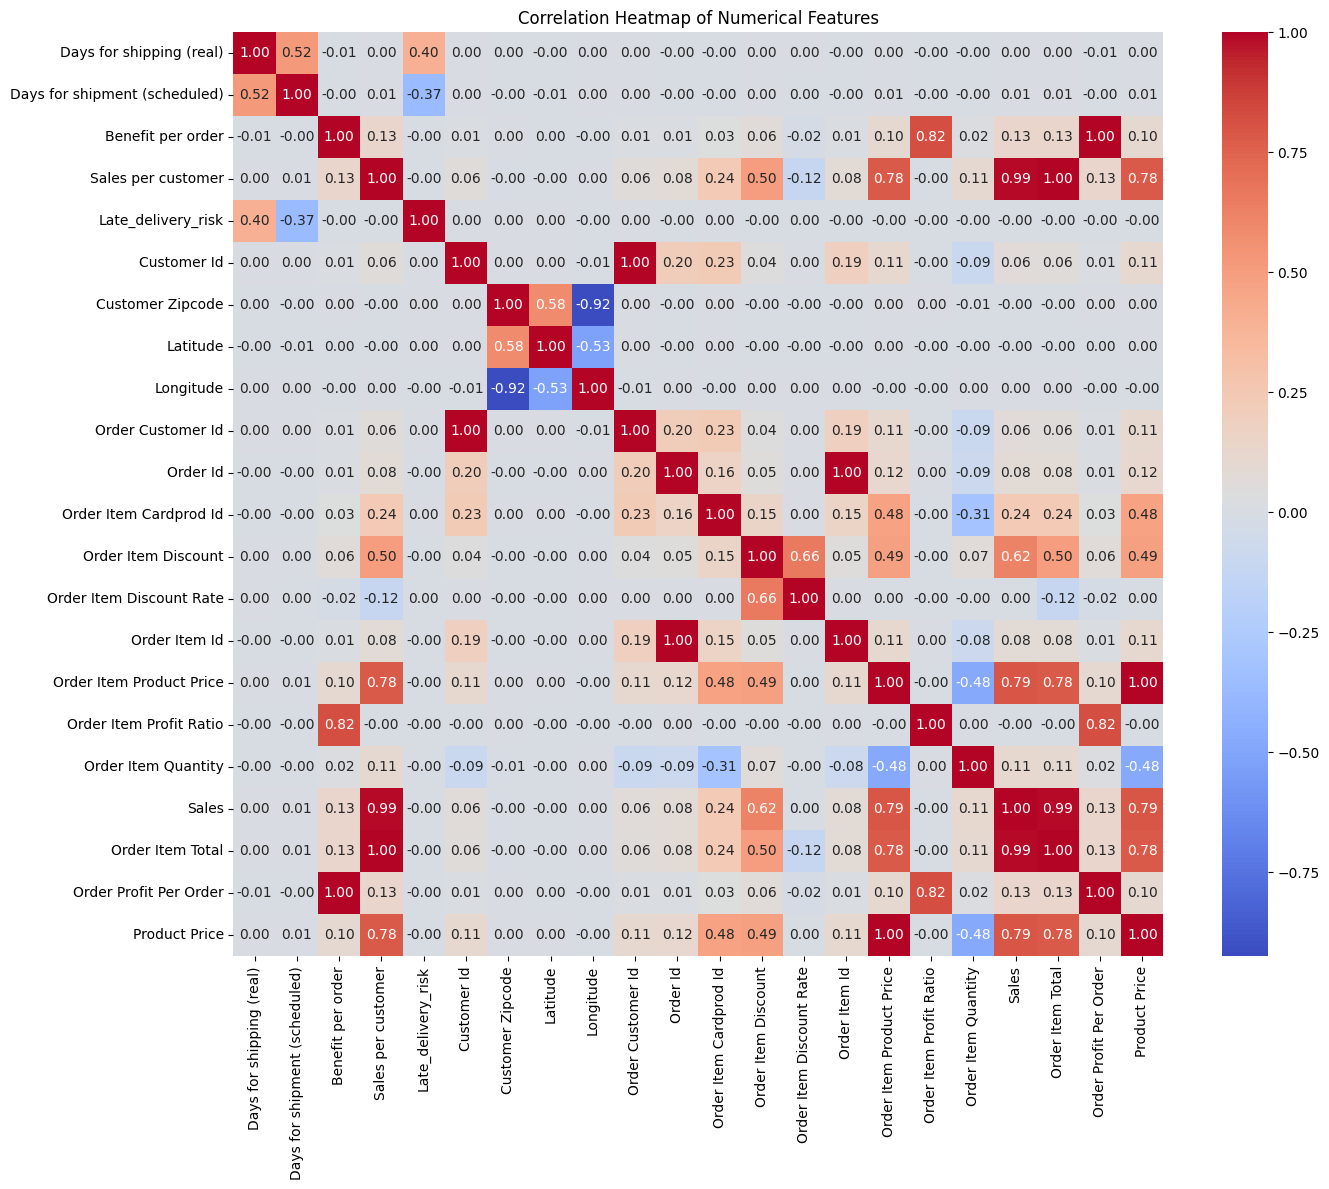

In [ ]:
# 4. Correlation Heatmap of Numerical Features:

# Computing correlation matrix for numerical features
numerical_features = supply_chain_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = supply_chain_df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Exploring the Unstructured Data (access_logs_df)

# 1. Summary Statistics for Unstructured Data

# Summary statistics for numerical columns
print("\nSummary Statistics for Unstructured Data:")
display(access_logs_df.describe())

# Check data types
print("\nUnstructured Data Info:")
access_logs_df.info()


Summary Statistics for Unstructured Data:


,Hour
count,469977.000000
mean,14.591827
std,5.574014
min,0.000000
25%,10.000000
50%,15.000000
75%,20.000000
max,23.000000



Unstructured Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [ ]:
# Converting the "Date" to datetime
access_logs_df['Date'] = pd.to_datetime(access_logs_df['Date'], errors='coerce')

# Verifying conversion
print("\nData Types After Date Conversion:")
print(access_logs_df.dtypes)



Data Types After Date Conversion:
Product               object
Category              object
Date          datetime64[ns]
Month                 object
Hour                   int64
Department            object
ip                    object
url                   object
dtype: object


In [ ]:
# Listing all of categorical columns
categorical_cols_access = ['Product', 'Category', 'Department', 'ip', 'url']

# Converting to 'category' dtype
for col in categorical_cols_access:
    access_logs_df[col] = access_logs_df[col].astype('category')

# Verifying conversion
print("\nData Types After Categorical Conversion:")
print(access_logs_df[categorical_cols_access].dtypes)



Data Types After Categorical Conversion:
Product       category
Category      category
Department    category
ip            category
url           category
dtype: object


<ipython-input-20-82ea383b1685>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=access_logs_df, palette='viridis')


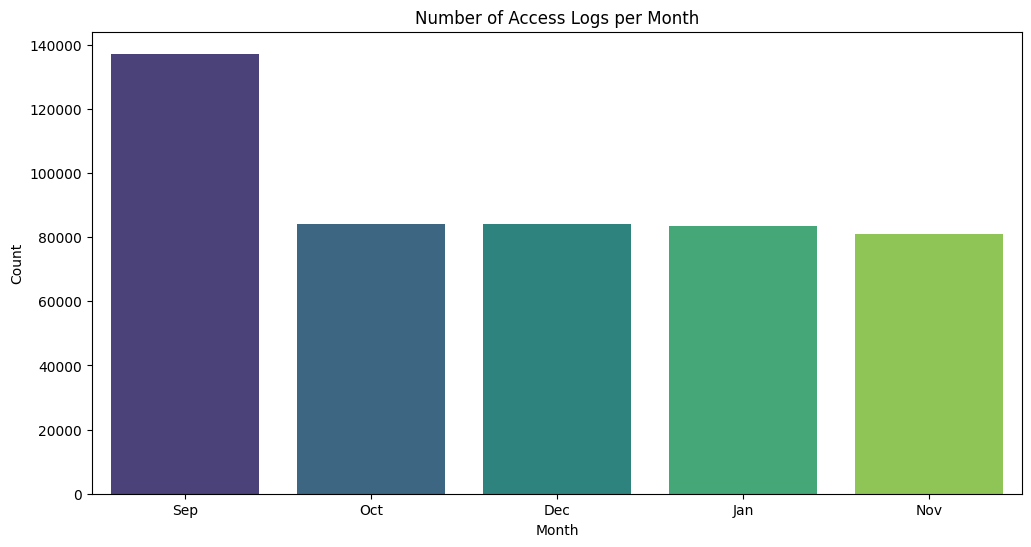

<ipython-input-20-82ea383b1685>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Department', data=access_logs_df, palette='magma', order=access_logs_df['Department'].value_counts().index)


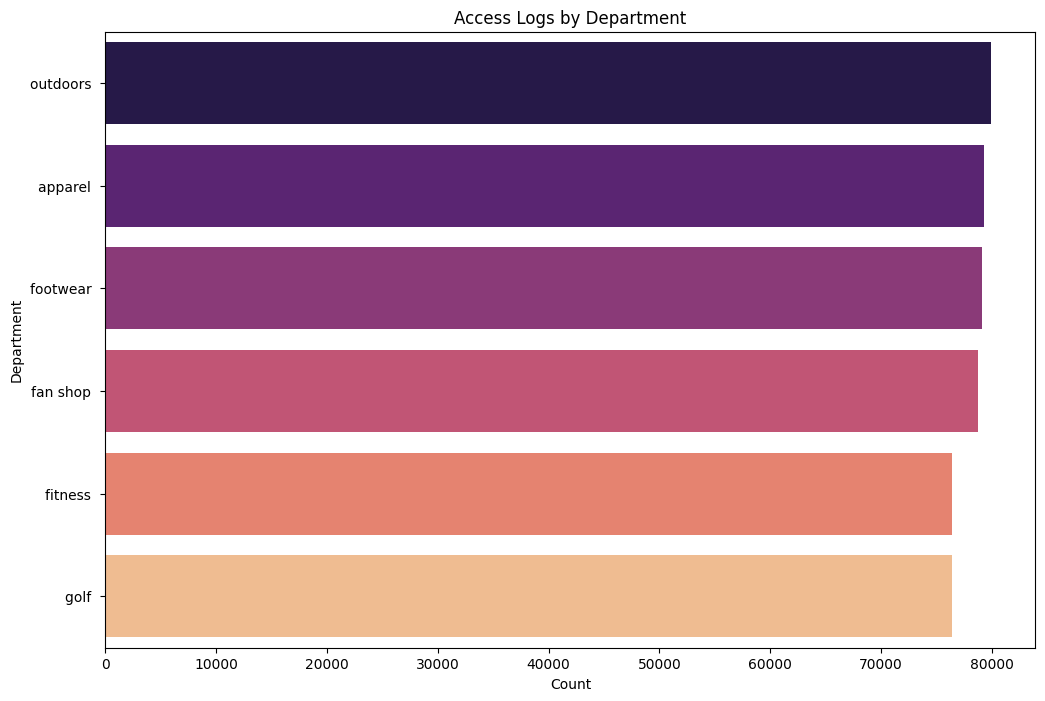

In [ ]:
# Plot number of access logs per month
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=access_logs_df, palette='viridis')
plt.title('Number of Access Logs per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Countplot for 'Department'
plt.figure(figsize=(12,8))
sns.countplot(y='Department', data=access_logs_df, palette='magma', order=access_logs_df['Department'].value_counts().index)
plt.title('Access Logs by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

<ipython-input-21-219951828018>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


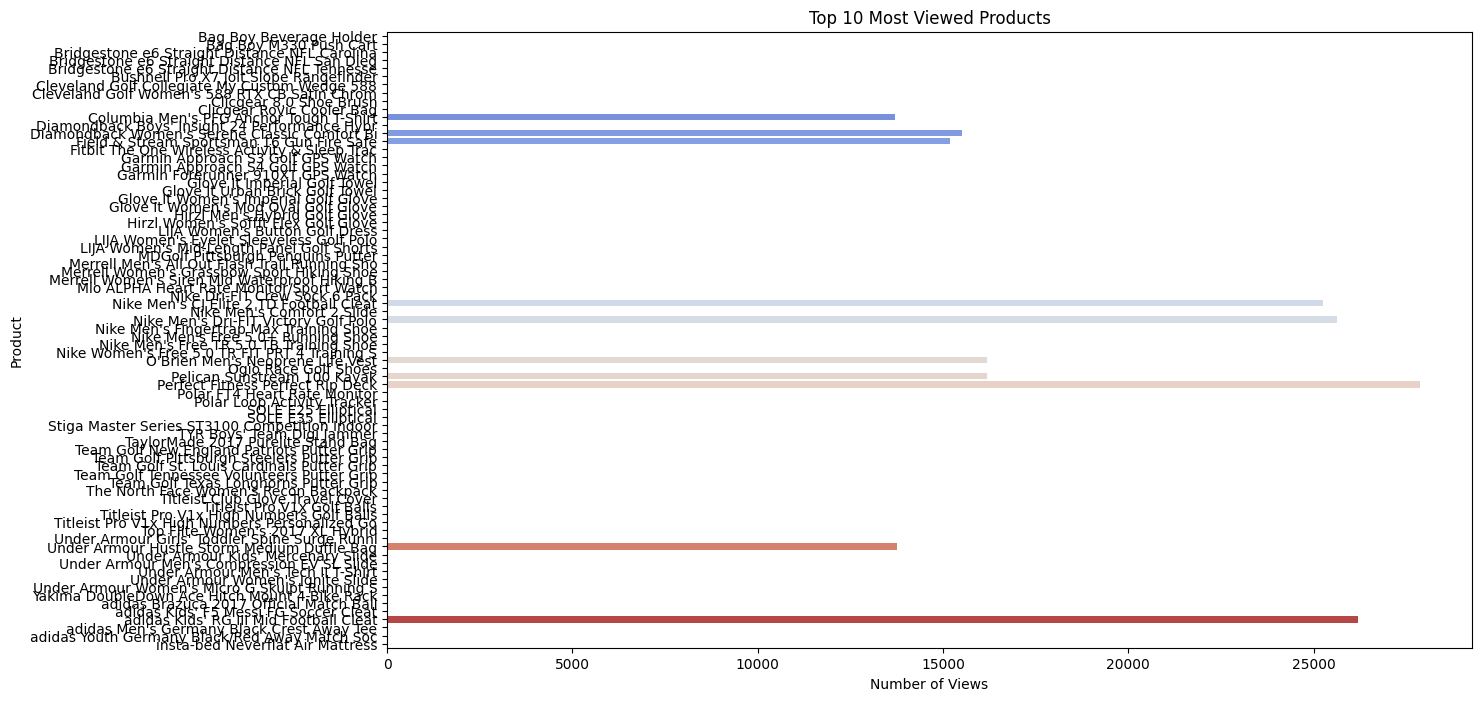

In [ ]:
# Bar plot for top 10 most viewed products
top_products = access_logs_df['Product'].value_counts().head(10)
plt.figure(figsize=(14,8))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Most Viewed Products')
plt.xlabel('Number of Views')
plt.ylabel('Product')
plt.show()


## Integrating Structure and Unstructured Data



In [ ]:
#1. Strip whitespace and convert to lowercase for consistency
supply_chain_df['Product Name'] = supply_chain_df['Product Name'].str.strip().str.lower()
access_logs_df['Product'] = access_logs_df['Product'].str.strip().str.lower()

#2.  Extract date without time for merging
supply_chain_df['order_date_only'] = supply_chain_df['order date (DateOrders)'].dt.date
access_logs_df['access_date_only'] = access_logs_df['Date'].dt.date

In [ ]:
#3.  Aggregate access logs by Product and Date
access_logs_agg = access_logs_df.groupby(['Product', 'access_date_only']).agg({
    'ip': 'count'  # Example: count number of accesses
}).reset_index().rename(columns={'ip': 'access_count'})

In [ ]:
#4.  Merge with structured data
merged_df = pd.merge(
    supply_chain_df,
    access_logs_agg,
    left_on=['Product Name', 'order_date_only'],
    right_on=['Product', 'access_date_only'],
    how='left'
)

# Fill NaN access counts with 0
merged_df['access_count'].fillna(0, inplace=True)

# Drop redundant columns
merged_df = merged_df.drop(['Product', 'access_date_only'], axis=1)

print("\nMerged Data Sample:")
display(merged_df.head())


Merged Data Sample:


<ipython-input-24-57500dd89107>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['access_count'].fillna(0, inplace=True)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_date_only,access_count
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,smart watch,327.75,0,2018-02-03 22:56:00,Standard Class,2018-01-31,0.0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,smart watch,327.75,0,2018-01-18 12:27:00,Standard Class,2018-01-13,0.0
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,http://images.acmesports.sports/Smart+watch,smart watch,327.75,0,2018-01-17 12:06:00,Standard Class,2018-01-13,0.0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,http://images.acmesports.sports/Smart+watch,smart watch,327.75,0,2018-01-16 11:45:00,Standard Class,2018-01-13,0.0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,http://images.acmesports.sports/Smart+watch,smart watch,327.75,0,2018-01-15 11:24:00,Standard Class,2018-01-13,0.0


# **Feature Engineering and Data Preparation**

In [ ]:
# Creating Time-Based Features to capture trends and seasonality

# Extracting year, month, day, and weekday from 'shipping date (DateOrders)'
merged_df['Shipping_Year'] = merged_df['shipping date (DateOrders)'].dt.year
merged_df['Shipping_Month'] = merged_df['shipping date (DateOrders)'].dt.month
merged_df['Shipping_Day'] = merged_df['shipping date (DateOrders)'].dt.day
merged_df['Shipping_Weekday'] = merged_df['shipping date (DateOrders)'].dt.weekday

# Display the new features
print("\nNew Time-Based Features:")
display(merged_df[['shipping date (DateOrders)', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day', 'Shipping_Weekday']].head())



New Time-Based Features:


,shipping date (DateOrders),Shipping_Year,Shipping_Month,Shipping_Day,Shipping_Weekday
0,2018-02-03 22:56:00,2018,2,3,5
1,2018-01-18 12:27:00,2018,1,18,3
2,2018-01-17 12:06:00,2018,1,17,2
3,2018-01-16 11:45:00,2018,1,16,1
4,2018-01-15 11:24:00,2018,1,15,0


In [ ]:
# Creating Interaction between "Benefit per order" and "sales per customs"

# Interaction between 'Benefit per order' and 'Sales per customer'
merged_df['Benefit_Sales_Interaction'] = merged_df['Benefit per order'] * merged_df['Sales per customer']

# Display the new feature
print("\nBenefit_Sales_Interaction Feature:")
display(merged_df[['Benefit per order', 'Sales per customer', 'Benefit_Sales_Interaction']].head())



Benefit_Sales_Interaction Feature:


,Benefit per order,Sales per customer,Benefit_Sales_Interaction
0,91.250000,314.640015,28710.901332
1,-249.089996,311.359985,-77556.657611
2,-247.779999,309.720001,-76742.421526
3,22.860001,304.809998,6967.956731
4,134.210007,298.250000,40028.134498


In [ ]:
# Encoding Categorical Variables

#1. One-Hot Encoding

# List of categorical columns to encode
categorical_cols_encoded = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State',
    'Department Name', 'Market', 'Order City', 'Order Country',
    'Order Status', 'Product Name', 'Product Status', 'Shipping Mode'
]

# Perform One-Hot Encoding
merged_df_encoded = pd.get_dummies(
    merged_df,
    columns=categorical_cols_encoded,
    drop_first=True  # To avoid dummy variable trap
)

print("\nEncoded Features:")
display(merged_df_encoded.head())






Encoded Features:


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Email,Customer Fname,Customer Id,Customer Lname,...,Product Name_under armour men's compression ev sl slide,Product Name_under armour men's tech ii t-shirt,Product Name_under armour women's ignite pip vi slide,Product Name_under armour women's ignite slide,Product Name_under armour women's micro g skulpt running s,Product Name_web camera,Product Name_yakima doubledown ace hitch mount 4-bike rack,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,3,4,91.250000,314.640015,0,73,XXXXXXXXX,Cally,20755,Holloway,...,False,False,False,False,False,False,False,False,False,True
1,5,4,-249.089996,311.359985,1,73,XXXXXXXXX,Irene,19492,Luna,...,False,False,False,False,False,False,False,False,False,True
2,4,4,-247.779999,309.720001,0,73,XXXXXXXXX,Gillian,19491,Maldonado,...,False,False,False,False,False,False,False,False,False,True
3,3,4,22.860001,304.809998,0,73,XXXXXXXXX,Tana,19490,Tate,...,False,False,False,False,False,False,False,False,False,True
4,2,4,134.210007,298.250000,0,73,XXXXXXXXX,Orli,19489,Hendricks,...,False,False,False,False,False,False,False,False,False,True


## Defining Targets and Features based my research questions

In [ ]:
# Defining Targets and Features based my research questions to check operational downtime and financial losses.

# Define target variables
target_downtime = 'Days for shipping (real)'
target_financial = 'Benefit per order'

# Features (excluding target variables and non-relevant columns)
features_to_drop = [
    'shipping date (DateOrders)', 'order date (DateOrders)', 'Product Name',
    'access_count', 'Benefit per order', 'Sales per customer'  # Drop targets from features
]

X = merged_df_encoded.drop([target_downtime, target_financial] + features_to_drop, axis=1, errors='ignore')
y_downtime = merged_df_encoded[target_downtime]
y_financial = merged_df_encoded[target_financial]



## Splitting the Data into Training and Testing Sets

In [ ]:
# Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split for Downtime
X_train_downtime, X_test_downtime, y_train_downtime, y_test_downtime = train_test_split(
    X, y_downtime, test_size=0.2, random_state=42
)

# Split for Financial
X_train_financial, X_test_financial, y_train_financial, y_test_financial = train_test_split(
    X, y_financial, test_size=0.2, random_state=42
)

print("\nTraining and Testing Sets Created.")
print(f"Downtime - Training set: {X_train_downtime.shape}, Testing set: {X_test_downtime.shape}")
print(f"Financial - Training set: {X_train_financial.shape}, Testing set: {X_test_financial.shape}")


Training and Testing Sets Created.
Downtime - Training set: (144415, 4603), Testing set: (36104, 4603)
Financial - Training set: (144415, 4603), Testing set: (36104, 4603)


## Verifying Target Variable Distributions

Why It's Important:

*   Model Generalization: Consistent distributions help models generalize well to unseen data.
*   Bias Prevention: Prevents introducing bias that could skew model performance.

Next Steps:

I will be conducting a visual comparison of Distributions; and show statistical comparison of summary statistics.

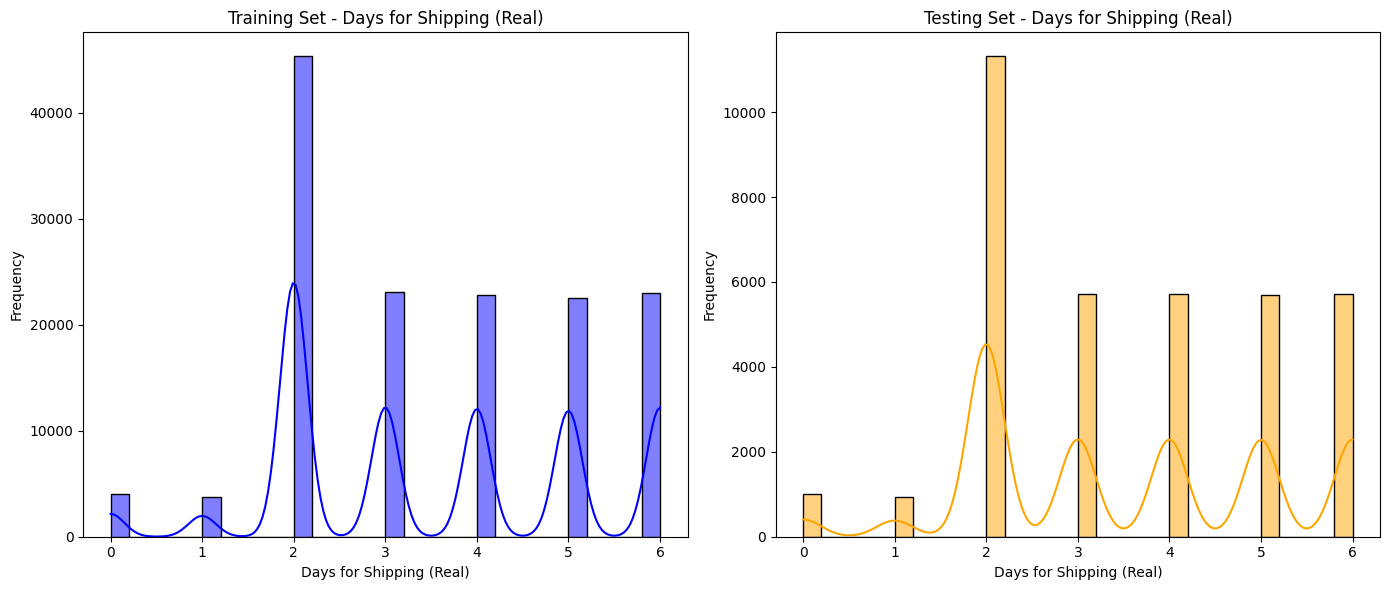

In [ ]:
# 1. Visual comparison of Distributions


# To see if the number of shipping days is similarly spread in both training and testing sets.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Days for shipping (real)' in training and testing sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train_downtime, bins=30, kde=True, color='blue')
plt.title('Training Set - Days for Shipping (Real)')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_test_downtime, bins=30, kde=True, color='orange')
plt.title('Testing Set - Days for Shipping (Real)')
plt.xlabel('Days for Shipping (Real)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


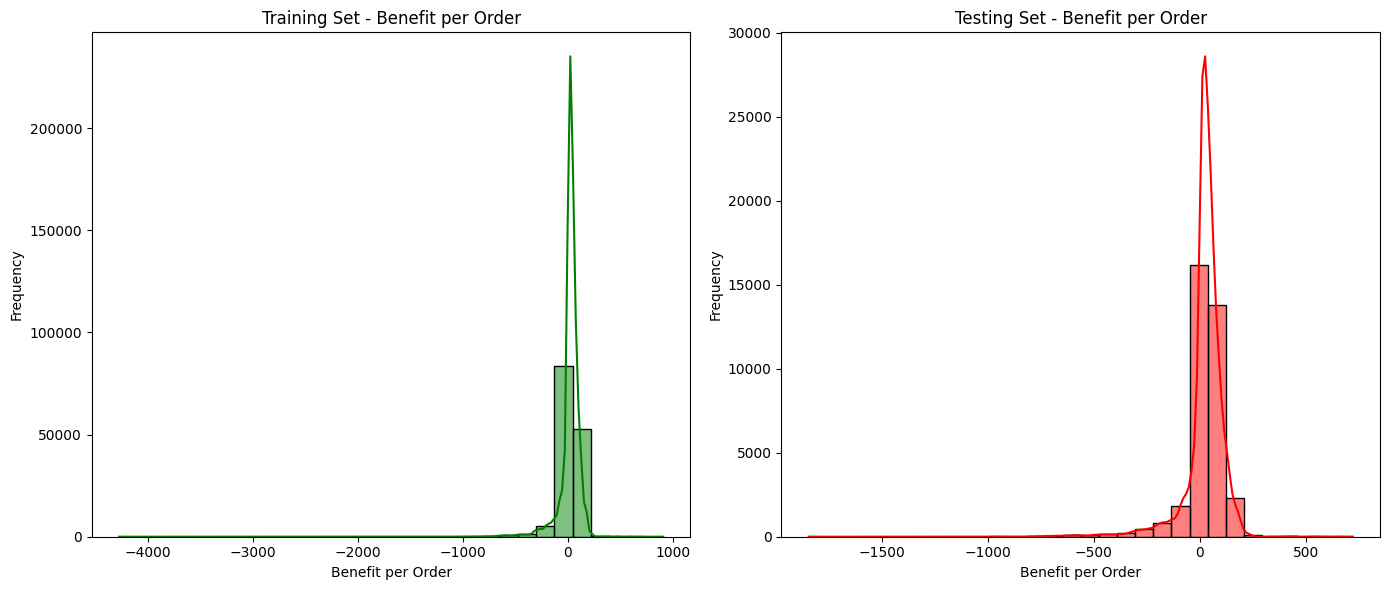

In [ ]:
# To assess if the financial benefits per order are similarly distributed across both sets.

# Plot distribution of 'Benefit per order' in training and testing sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_train_financial, bins=30, kde=True, color='green')
plt.title('Training Set - Benefit per Order')
plt.xlabel('Benefit per Order')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_test_financial, bins=30, kde=True, color='red')
plt.title('Testing Set - Benefit per Order')
plt.xlabel('Benefit per Order')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
# 2. Statistical Comparison of Summary Statistics


# a. Summary Statistics for Days for shipping (real) - key statistics like mean, median, standard deviation, etc., between training and testing sets.

# Summary statistics for 'Days for shipping (real)'
print("Summary Statistics for Days for Shipping (Real):\n")

print("Training Set:")
print(y_train_downtime.describe())

print("\nTesting Set:")
print(y_test_downtime.describe())




Summary Statistics for Days for Shipping (Real):

Training Set:
count    144415.000000
mean          3.497566
std           1.623759
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: Days for shipping (real), dtype: float64

Testing Set:
count    36104.000000
mean         3.498006
std          1.623596
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Days for shipping (real), dtype: float64


In [ ]:
# b. Summary Statistics for Benefit per order.

# Summary statistics for 'Benefit per order'
print("\nSummary Statistics for Benefit per Order:\n")

print("Training Set:")
print(y_train_financial.describe())

print("\nTesting Set:")
print(y_test_financial.describe())



Summary Statistics for Benefit per Order:

Training Set:
count    144415.000000
mean         21.898464
std         105.180860
min       -4274.979980
25%           7.040000
50%          31.520000
75%          64.790001
max         911.799988
Name: Benefit per order, dtype: float64

Testing Set:
count    36104.000000
mean        22.281085
std        101.389989
min      -1844.979980
25%          6.847500
50%         31.620001
75%         65.172499
max        721.599976
Name: Benefit per order, dtype: float64


## Outcome:

- Consistent Distributions: Similar shapes, central tendencies, and spreads.
- No Significant Discrepancies: Minimal differences in summary statistics.
- Training Set - Days for Shipping (Real): Majority of orders are shipped within 3-5 days.
- Testing Set - Days for Shipping (Real): Similar distribution with a slight variation in the tail.


### Summary Statistics:
Interpretation:

- Mean and Median: Both sets have similar central tendencies.
- Standard Deviation: Comparable variability.
- Range: Both sets cover similar ranges of shipping days.

In [ ]:

# Check the shapes
print(f"Shape of X_train_downtime: {X_train_downtime.shape}")
print(f"Shape of y_train_downtime: {y_train_downtime.shape}")

Shape of X_train_downtime: (144415, 4603)
Shape of y_train_downtime: (144415,)


In [ ]:
# Remove rows with missing values from X_train_downtime
X_train_downtime_clean = X_train_downtime.dropna()

# Align y_train_downtime to match the cleaned X_train_downtime
y_train_downtime_clean = y_train_downtime.loc[X_train_downtime_clean.index]

# Update the original datasets
X_train_downtime = X_train_downtime_clean
y_train_downtime = y_train_downtime_clean

print(f"Updated shape of X_train_downtime: {X_train_downtime.shape}")
print(f"Updated shape of y_train_downtime: {y_train_downtime.shape}")


Updated shape of X_train_downtime: (144413, 4603)
Updated shape of y_train_downtime: (144413,)


In [ ]:
# List of columns to drop
columns_to_drop = [
    'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
    'Customer Street', 'Product Image', 'order_date_only'
]

# Drop the columns from both training and testing sets
X_train_downtime = X_train_downtime.drop(columns=columns_to_drop, errors='ignore')
X_test_downtime = X_test_downtime.drop(columns=columns_to_drop, errors='ignore')

print("Dropped irrelevant non-numeric columns.")


Dropped irrelevant non-numeric columns.


In [ ]:
# Display all column names in X_train_downtime
print("Columns in X_train_downtime:")
print(X_train_downtime.columns.tolist())


Columns in X_train_downtime:
['Days for shipment (scheduled)', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Product Card Id', 'Product Category Id', 'Product Price', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day', 'Shipping_Weekday', 'Benefit_Sales_Interaction', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Delivery Status_Late delivery', 'Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time', 'Category Name_As Seen on  TV!', 'Category Name_Baby ', 'Category Name_Baseball & Softball', 'Category Name_Basketball', 'Category Name_Books ', 'Category Name_Boxing & MMA', 'Category Name_CDs ', 'Category Name_Cameras 

In [ ]:
# Check for columns that start with 'Order Country_'
encoded_order_country_cols = [col for col in X_train_downtime.columns if col.startswith('Order Country_')]
print("Encoded 'Order Country' Columns:")
print(encoded_order_country_cols)



Encoded 'Order Country' Columns:
['Order Country_Albania', 'Order Country_Alemania', 'Order Country_Angola', 'Order Country_Arabia Saudí', 'Order Country_Argelia', 'Order Country_Argentina', 'Order Country_Armenia', 'Order Country_Australia', 'Order Country_Austria', 'Order Country_Azerbaiyán', 'Order Country_Bangladés', 'Order Country_Barbados', 'Order Country_Baréin', 'Order Country_Belice', 'Order Country_Benín', 'Order Country_Bielorrusia', 'Order Country_Bolivia', 'Order Country_Bosnia y Herzegovina', 'Order Country_Botsuana', 'Order Country_Brasil', 'Order Country_Bulgaria', 'Order Country_Burkina Faso', 'Order Country_Burundi', 'Order Country_Bután', 'Order Country_Bélgica', 'Order Country_Camboya', 'Order Country_Camerún', 'Order Country_Canada', 'Order Country_Chad', 'Order Country_Chile', 'Order Country_China', 'Order Country_Chipre', 'Order Country_Colombia', 'Order Country_Corea del Sur', 'Order Country_Costa Rica', 'Order Country_Costa de Marfil', 'Order Country_Croacia', 

In [ ]:
# Original categorical columns (including 'Order Country')
# categorical_columns = ['Order Country', 'Order City']

# Updated categorical columns (excluding 'Order Country')
categorical_columns = ['Order City']



In [ ]:

# Check data types of all columns
print("\nData Types in X_train_downtime:")
print(X_train_downtime.dtypes.value_counts())

# Identify any remaining non-numeric columns
non_numeric_cols = X_train_downtime.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nNon-numeric columns remaining in X_train_downtime: {non_numeric_cols}")



Data Types in X_train_downtime:
bool        4566
float64       12
int64          8
int32          4
category       2
object         2
category       1
category       1
Name: count, dtype: int64

Non-numeric columns remaining in X_train_downtime: ['Category Id', 'Department Id', 'Order Region', 'Order State', 'Product Card Id', 'Product Category Id']


In [ ]:
# Remove rows with missing values from X_train_downtime
X_train_downtime_clean = X_train_downtime.dropna()
y_train_downtime_clean = y_train_downtime.loc[X_train_downtime_clean.index]

# Update the original datasets
X_train_downtime = X_train_downtime_clean
y_train_downtime = y_train_downtime_clean

print(f"\nUpdated shape of X_train_downtime: {X_train_downtime.shape}")
print(f"Updated shape of y_train_downtime: {y_train_downtime.shape}")



Updated shape of X_train_downtime: (144413, 4596)
Updated shape of y_train_downtime: (144413,)


In [ ]:
# Identify all categorical columns in X_train_downtime
categorical_cols = X_train_downtime.select_dtypes(include=['category']).columns.tolist()

# Display the list of categorical columns
print("Categorical columns in X_train_downtime:")
print(categorical_cols)

Categorical columns in X_train_downtime:
['Category Id', 'Department Id', 'Product Card Id', 'Product Category Id']


In [ ]:
# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    if X_train_downtime[col].isnull().any():
        mode_value = X_train_downtime[col].mode()[0]
        X_train_downtime[col].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in '{col}' with mode: {mode_value}")



In [ ]:
# Verify that there are no missing values in categorical columns
missing_categorical = X_train_downtime[categorical_cols].isnull().sum().sum()
print(f"\nTotal missing values in categorical columns after imputation: {missing_categorical}")



Total missing values in categorical columns after imputation: 0


In [ ]:
# Identify numeric columns
numeric_cols = X_train_downtime.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values in numeric columns with the mean
X_train_downtime[numeric_cols] = X_train_downtime[numeric_cols].fillna(X_train_downtime[numeric_cols].mean())

print("\nImputed missing values in numeric columns with the mean.")



Imputed missing values in numeric columns with the mean.


In [ ]:
# Check for any remaining missing values in X_train_downtime
total_missing = X_train_downtime.isnull().sum().sum()
print(f"\nTotal missing values in X_train_downtime after imputation: {total_missing}")



Total missing values in X_train_downtime after imputation: 0


In [ ]:
## Check the Data Type of y_train_downtime

# Check the data type of y_train_downtime
print("Data type of y_train_downtime:")
print(y_train_downtime.dtype)


Data type of y_train_downtime:
int64


In [ ]:
# Display unique values in y_train_downtime
print("\nUnique values in y_train_downtime:")
print(y_train_downtime.unique())

# Display the first few rows of y_train_downtime
print("\nFirst 10 values in y_train_downtime:")
print(y_train_downtime.head(10))


Unique values in y_train_downtime:
[2 3 5 1 4 6 0]

First 10 values in y_train_downtime:
116587    2
36340     2
175763    2
96918     2
71197     2
130357    2
171814    2
40795     3
58422     2
166252    3
Name: Days for shipping (real), dtype: int64


In [ ]:
# Check for any non-numeric data in X_train_downtime
non_numeric_cols = X_train_downtime.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nNon-numeric columns remaining in X_train_downtime: {non_numeric_cols}")




Non-numeric columns remaining in X_train_downtime: ['Category Id', 'Department Id', 'Order Region', 'Order State', 'Product Card Id', 'Product Category Id']


In [ ]:
# 'Some Column' is non-numeric
if 'Some Column' in non_numeric_cols:
    # Apply appropriate encoding
    X_train_downtime['Some Column'] = X_train_downtime['Some Column'].astype('category').cat.codes


In [ ]:
# Encoding 'Order City_Freq' if it's mistakenly non-numeric
if 'Order City_Freq' in non_numeric_cols:
    X_train_downtime['Order City_Freq'] = pd.to_numeric(X_train_downtime['Order City_Freq'], errors='coerce')
    X_test_downtime['Order City_Freq'] = pd.to_numeric(X_test_downtime['Order City_Freq'], errors='coerce')

# Re-check non-numeric columns
non_numeric_cols = X_train_downtime.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nNon-numeric columns after encoding: {non_numeric_cols}")



Non-numeric columns after encoding: ['Category Id', 'Department Id', 'Order Region', 'Order State', 'Product Card Id', 'Product Category Id']


In [ ]:
# Check for any remaining missing values in X_train_downtime
total_missing = X_train_downtime.isnull().sum().sum()
print(f"\nTotal missing values in X_train_downtime after previous imputation: {total_missing}")



Total missing values in X_train_downtime after previous imputation: 0


In [ ]:
# List all columns in X_train_downtime
print("Columns in X_train_downtime:")
print(X_train_downtime.columns.tolist())


Columns in X_train_downtime:
['Days for shipment (scheduled)', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Product Card Id', 'Product Category Id', 'Product Price', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day', 'Shipping_Weekday', 'Benefit_Sales_Interaction', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Delivery Status_Late delivery', 'Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time', 'Category Name_As Seen on  TV!', 'Category Name_Baby ', 'Category Name_Baseball & Softball', 'Category Name_Basketball', 'Category Name_Books ', 'Category Name_Boxing & MMA', 'Category Name_CDs ', 'Category Name_Cameras 

In [ ]:
# Updated list of non-numeric categorical columns based on current DataFrame
categorical_columns = ['Category Id', 'Department Id', 'Product Card Id', 'Product Category Id']


In [ ]:
# Check the number of unique values in each categorical column
for col in categorical_columns:
    unique_count = X_train_downtime[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'Category Id' has 51 unique values.
Column 'Department Id' has 11 unique values.
Column 'Product Card Id' has 118 unique values.
Column 'Product Category Id' has 51 unique values.


In [ ]:
# Updated list of non-numeric categorical columns
categorical_columns = ['Category Id', 'Department Id', 'Product Card Id', 'Product Category Id']

print("Updated categorical_columns list:")
print(categorical_columns)


Updated categorical_columns list:
['Category Id', 'Department Id', 'Product Card Id', 'Product Category Id']


In [ ]:
# One-Hot Encoding for 'Department Id'
X_train_downtime = pd.get_dummies(X_train_downtime, columns=['Department Id'], drop_first=True)
X_test_downtime = pd.get_dummies(X_test_downtime, columns=['Department Id'], drop_first=True)

# Align the training and testing sets to have the same columns
X_train_downtime, X_test_downtime = X_train_downtime.align(X_test_downtime, join='left', axis=1, fill_value=0)

print("\nOne-Hot Encoded 'Department Id' and aligned the datasets.")



One-Hot Encoded 'Department Id' and aligned the datasets.


In [ ]:
# Frequency Encoding for 'Category Id'
# Calculate frequency of each category in the training set
category_freq = X_train_downtime['Category Id'].value_counts()

# Map the frequency to both training and testing sets
X_train_downtime['Category Id_Freq'] = X_train_downtime['Category Id'].map(category_freq)
X_test_downtime['Category Id_Freq'] = X_test_downtime['Category Id'].map(category_freq).fillna(0)

# Drop the original categorical column
X_train_downtime = X_train_downtime.drop('Category Id', axis=1)
X_test_downtime = X_test_downtime.drop('Category Id', axis=1)

print("Frequency Encoded and Dropped 'Category Id'.")


Frequency Encoded and Dropped 'Category Id'.


In [ ]:
# Frequency Encoding for 'Product Card Id'
# Calculate frequency of each category in the training set
product_card_freq = X_train_downtime['Product Card Id'].value_counts()

# Map the frequency to both training and testing sets
X_train_downtime['Product Card Id_Freq'] = X_train_downtime['Product Card Id'].map(product_card_freq)
X_test_downtime['Product Card Id_Freq'] = X_test_downtime['Product Card Id'].map(product_card_freq).fillna(0)

# Drop the original categorical column
X_train_downtime = X_train_downtime.drop('Product Card Id', axis=1)
X_test_downtime = X_test_downtime.drop('Product Card Id', axis=1)

print("Frequency Encoded and Dropped 'Product Card Id'.")


Frequency Encoded and Dropped 'Product Card Id'.


In [ ]:
# Frequency Encoding for 'Product Category Id'

# Calculate frequency of each category in the training set
product_category_freq = X_train_downtime['Product Category Id'].value_counts()

# Map the frequency to both training and testing sets
X_train_downtime['Product Category Id_Freq'] = X_train_downtime['Product Category Id'].map(product_category_freq)
X_test_downtime['Product Category Id_Freq'] = X_test_downtime['Product Category Id'].map(product_category_freq).fillna(0)

# Drop the original categorical column
X_train_downtime = X_train_downtime.drop('Product Category Id', axis=1)
X_test_downtime = X_test_downtime.drop('Product Category Id', axis=1)

print("Frequency Encoded and Dropped 'Product Category Id'.")


Frequency Encoded and Dropped 'Product Category Id'.


In [ ]:
# List all columns in X_train_downtime after encoding
print("Columns in X_train_downtime after encoding 'Product Category Id':")
print(X_train_downtime.columns.tolist())


Columns in X_train_downtime after encoding 'Product Category Id':
['Days for shipment (scheduled)', 'Late_delivery_risk', 'Customer Id', 'Customer Zipcode', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Product Price', 'Shipping_Year', 'Shipping_Month', 'Shipping_Day', 'Shipping_Weekday', 'Benefit_Sales_Interaction', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Delivery Status_Late delivery', 'Delivery Status_Shipping canceled', 'Delivery Status_Shipping on time', 'Category Name_As Seen on  TV!', 'Category Name_Baby ', 'Category Name_Baseball & Softball', 'Category Name_Basketball', 'Category Name_Books ', 'Category Name_Boxing & MMA', 'Category Name_CDs ', 'Category Name_Cameras ', 'Category Name_Camping & Hiking', 

In [ ]:
# One-Hot Encoding for 'Order Region'
X_train_downtime = pd.get_dummies(X_train_downtime, columns=['Order Region'], drop_first=True)
X_test_downtime = pd.get_dummies(X_test_downtime, columns=['Order Region'], drop_first=True)

# Align the training and testing sets to have the same columns
X_train_downtime, X_test_downtime = X_train_downtime.align(X_test_downtime, join='left', axis=1, fill_value=0)

print("\nOne-Hot Encoded 'Order Region' and aligned the datasets.")




One-Hot Encoded 'Order Region' and aligned the datasets.


In [ ]:
# One-Hot Encoding for 'Order State'
X_train_downtime = pd.get_dummies(X_train_downtime, columns=['Order State'], drop_first=True)
X_test_downtime = pd.get_dummies(X_test_downtime, columns=['Order State'], drop_first=True)

# Align the training and testing sets to have the same columns
X_train_downtime, X_test_downtime = X_train_downtime.align(X_test_downtime, join='left', axis=1, fill_value=0)

print("\nOne-Hot Encoded 'Order State' and aligned the datasets.")



One-Hot Encoded 'Order State' and aligned the datasets.


In [ ]:
# Check for missing values in X_test_downtime
missing_values_test = X_test_downtime.isnull().sum().sum()
print(f"\nTotal missing values in X_test_downtime before handling: {missing_values_test}")

# Option 1: Remove the row with missing values
X_test_downtime = X_test_downtime.dropna()

print("Dropped rows with missing values in X_test_downtime.")

# Verify
missing_values_test_after = X_test_downtime.isnull().sum().sum()
print(f"Total missing values in X_test_downtime after dropping: {missing_values_test_after}")



Total missing values in X_test_downtime before handling: 1
Dropped rows with missing values in X_test_downtime.
Total missing values in X_test_downtime after dropping: 0


In [ ]:
# Check data types of all columns in X_train_downtime
print("\nData Types in X_train_downtime:")
print(X_train_downtime.dtypes.value_counts())

# Identify any remaining non-numeric columns
non_numeric_cols = X_train_downtime.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nNon-numeric columns remaining in X_train_downtime: {non_numeric_cols}")

# Check for missing values in X_test_downtime
missing_values_test = X_test_downtime.isnull().sum().sum()
print(f"\nTotal missing values in X_test_downtime: {missing_values_test}")



Data Types in X_train_downtime:
bool       5681
float64      12
int64        11
int32         4
Name: count, dtype: int64

Non-numeric columns remaining in X_train_downtime: []

Total missing values in X_test_downtime: 0


# Building and Training Predictive Models

This involves selecting appropriate machine learning algorithms, training them on the training data, and evaluating their performance on the testing data.

# Model Evaluation

Objective:

The goal is to assess the performance of the predictive models to determine how effectively they address the research questions.

`Research Questions `

- `RQ1:` How can predictive models and advanced technologies identify and reduce supply chain disruptions in the retail sector based on historical and real-time data analysis?
- `RQ2:` What are the success rates of predictive models and advanced technologies in mitigating supply chain disruptions, as measured by improvements in delivery times, inventing levels, and cost savings in real-world scenarios?

Why It's Important:

The reason for evaluating model performance ensures that these models are accurately predicting the target variables and are reliable for practical applications. It helps in understanding the strengths and limitations of each model, guiding further improvements.




## Initialize and Train: XGBoost Regressor

---



For each target variable and corresponding model, I would be calculating key evaluation metrics:

- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in predictions without considering their direction.
- **Mean Squared Error (MSE):** Measures the average of the squares of the errors, giving higher weight to larger errors.
- **Root Mean Squared Error (RMSE):** Measures the square root of the average squared differences between predicted and actual values, giving higher weight to larger errors.
- **R² Score:** Represents the proportion of variance in the dependent variable that's predictable from the independent variables.

In [ ]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

# Import evaluation metrics (if not already imported)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBoost Regressor with appropriate parameters
xgb_regressor = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    objective='reg:squarederror'  # Ensures the objective is set for regression
)

# Train the model on the training data
xgb_regressor.fit(X_train_downtime, y_train_downtime)

print("\nXGBoost Regressor trained successfully.")



XGBoost Regressor trained successfully.


In [ ]:
# Check the number of samples in X_test_downtime and y_test_downtime
print(f"Number of samples in X_test_downtime: {X_test_downtime.shape[0]}")
print(f"Number of samples in y_test_downtime: {y_test_downtime.shape[0]}")

# Inspect the indices of both datasets
print("\nIndices in X_test_downtime:", X_test_downtime.index.tolist())
print("Indices in y_test_downtime:", y_test_downtime.index.tolist())


Number of samples in X_test_downtime: 36103
Number of samples in y_test_downtime: 36104

Indices in X_test_downtime: [80120, 19670, 114887, 120110, 56658, 99465, 40749, 22688, 154389, 47301, 139428, 81076, 69250, 179442, 84697, 117424, 19341, 79749, 115555, 52341, 54296, 118340, 12890, 165387, 139523, 86329, 168450, 36658, 18846, 137738, 134452, 179790, 83116, 27236, 54321, 25220, 148949, 99670, 19492, 137811, 137651, 83958, 6382, 84941, 132899, 178319, 138322, 82988, 168219, 104230, 18498, 154312, 126777, 24436, 52880, 96671, 151106, 28529, 74359, 99117, 107119, 125148, 102564, 66725, 7323, 103557, 93921, 10436, 132186, 5820, 31221, 111238, 48681, 160397, 52392, 27520, 173745, 145769, 109402, 49873, 171059, 96531, 24277, 84625, 127363, 73581, 70154, 60141, 169317, 145054, 69725, 5090, 147387, 75219, 143943, 150513, 158564, 42916, 162929, 154289, 141399, 138512, 144729, 102086, 144055, 169392, 71824, 56191, 152231, 130766, 68639, 82284, 88371, 172533, 8199, 14055, 8420, 61996, 177143, 

In [ ]:
# Convert indices to sets for comparison
set_X_test = set(X_test_downtime.index)
set_y_test = set(y_test_downtime.index)

# Identify the missing index
missing_indices = set_y_test - set_X_test

print(f"\nMissing indices in X_test_downtime: {missing_indices}")



Missing indices in X_test_downtime: {46440}


In [ ]:
# Drop the missing index from y_test_downtime
y_test_downtime_aligned = y_test_downtime.drop(missing_indices)

# Verify the alignment
print(f"\nNumber of samples in X_test_downtime after alignment: {X_test_downtime.shape[0]}")
print(f"Number of samples in y_test_downtime_aligned: {y_test_downtime_aligned.shape[0]}")



Number of samples in X_test_downtime after alignment: 36103
Number of samples in y_test_downtime_aligned: 36103


In [ ]:
# Replace y_test_downtime with the aligned version
y_test_downtime = y_test_downtime_aligned

print(f"\nUpdated number of samples in y_test_downtime: {y_test_downtime.shape[0]}")

# Final check for alignment
print(f"\nFinal number of samples in X_test_downtime: {X_test_downtime.shape[0]}")
print(f"Final number of samples in y_test_downtime: {y_test_downtime.shape[0]}")

# Check if indices are identical
indices_identical = X_test_downtime.index.equals(y_test_downtime.index)
print(f"Are indices identical? {indices_identical}")



Updated number of samples in y_test_downtime: 36103

Final number of samples in X_test_downtime: 36103
Final number of samples in y_test_downtime: 36103
Are indices identical? True


In [ ]:
# Make predictions on the test set using XGBoost
y_pred_downtime_xgb = xgb_regressor.predict(X_test_downtime)

# Calculate evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test_downtime, y_pred_downtime_xgb)
mse_xgb = mean_squared_error(y_test_downtime, y_pred_downtime_xgb)
rmse_xgb = mean_squared_error(y_test_downtime, y_pred_downtime_xgb, squared=False)
r2_xgb = r2_score(y_test_downtime, y_pred_downtime_xgb)

print("XGBoost Regressor Performance for Days for Shipping (Real):")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R² Score: {r2_xgb}")


XGBoost Regressor Performance for Days for Shipping (Real):
MAE: 0.4191002649187072
MSE: 0.35689237798099555
RMSE: 0.5974047020077726
R² Score: 0.8646113276481628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Feature Importance Analysis Using SHAP

In [ ]:
# 1. Install SHAP
!pip install shap

# 2. Import SHAP and other necessary libraries
import shap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
# 3. Initialize the SHAP TreeExplainer for the trained XGBoost model
explainer = shap.Explainer(xgb_regressor)

# 4. Compute SHAP values for the test set
shap_values = explainer(X_test_downtime)



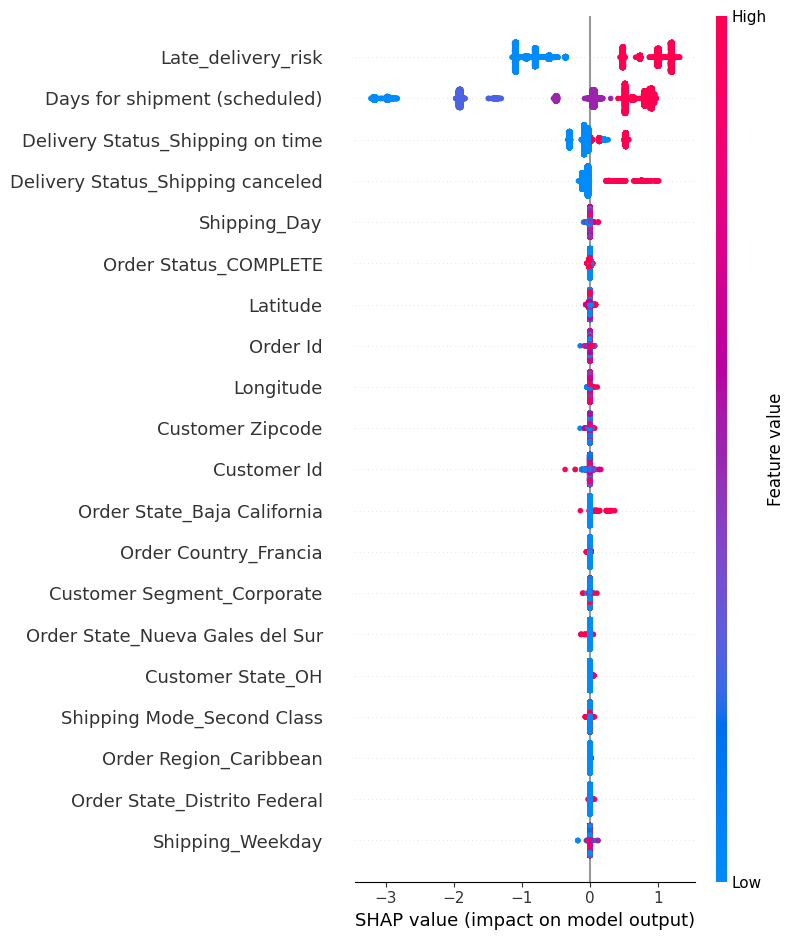

In [ ]:
import matplotlib.pyplot as plt
import shap

# Set the seed for Matplotlib
import random
random.seed(97)

# Initialize SHAP's JavaScript visualization
shap.initjs()

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_downtime, plot_type="dot")



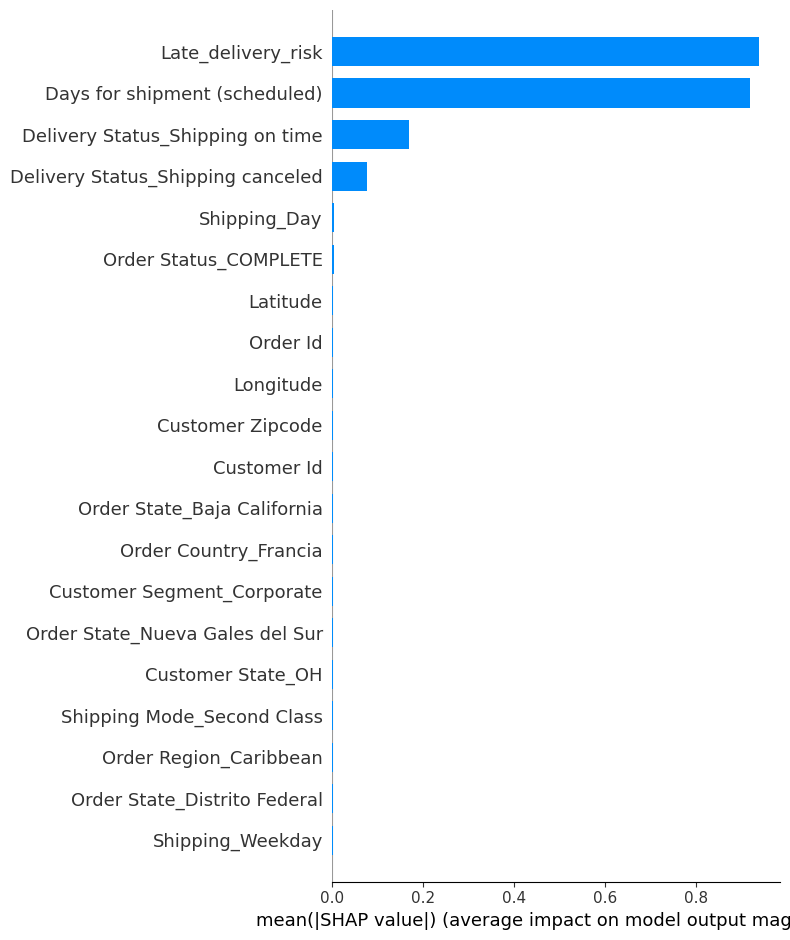

In [ ]:
# Plot SHAP feature importance as a bar plot
shap.summary_plot(shap_values, X_test_downtime, plot_type="bar")


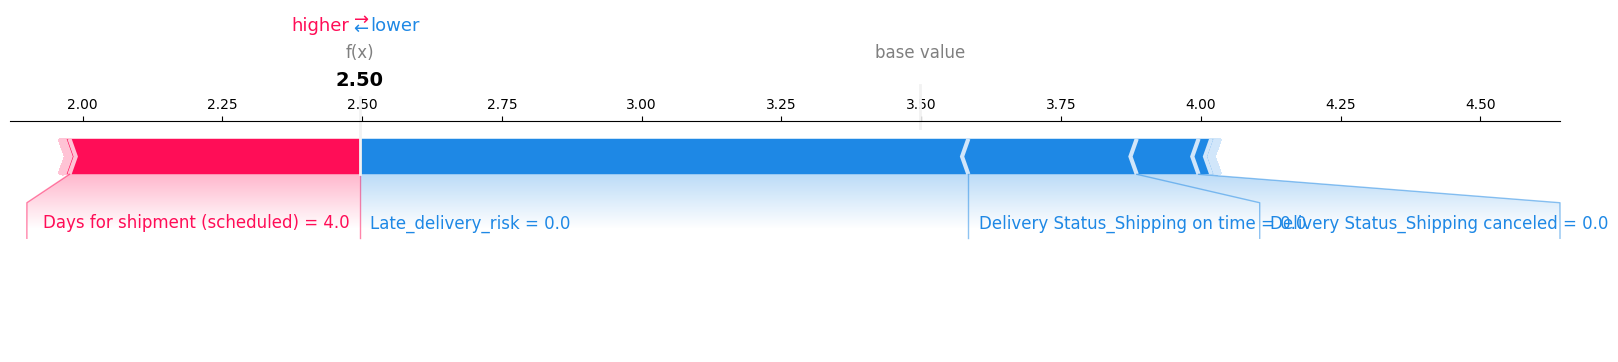

In [ ]:
# Select an instance to explain
instance_index = 10  # Change this index to analyze different samples

# Create a force plot for the selected instance
shap.force_plot(explainer.expected_value, shap_values[instance_index].values, X_test_downtime.iloc[instance_index], matplotlib=True)


## Model Validation and Robustness Checks

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_mae = cross_val_score(xgb_regressor, X_train_downtime, y_train_downtime, scoring='neg_mean_absolute_error', cv=kf)
cv_mse = cross_val_score(xgb_regressor, X_train_downtime, y_train_downtime, scoring='neg_mean_squared_error', cv=kf)

# Convert scores to positive values
cv_mae = -cv_mae
cv_mse = -cv_mse

print(f"Cross-Validated MAE: {cv_mae.mean()} ± {cv_mae.std()}")
print(f"Cross-Validated MSE: {cv_mse.mean()} ± {cv_mse.std()}")


Cross-Validated MAE: 0.42010471808260147 ± 0.0011036978157827318
Cross-Validated MSE: 0.35825186727496894 ± 0.0030627349977211324


## Residual Analysis

To identify patterns or biases in the model's errors.

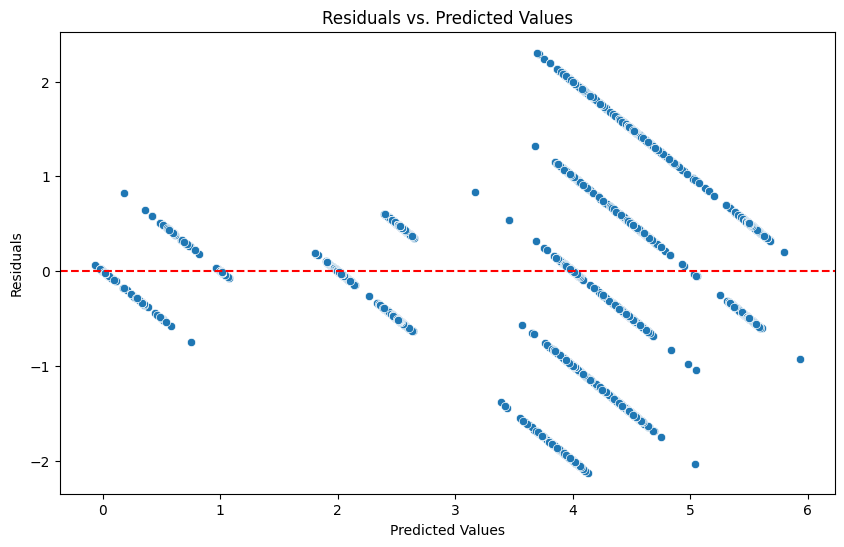

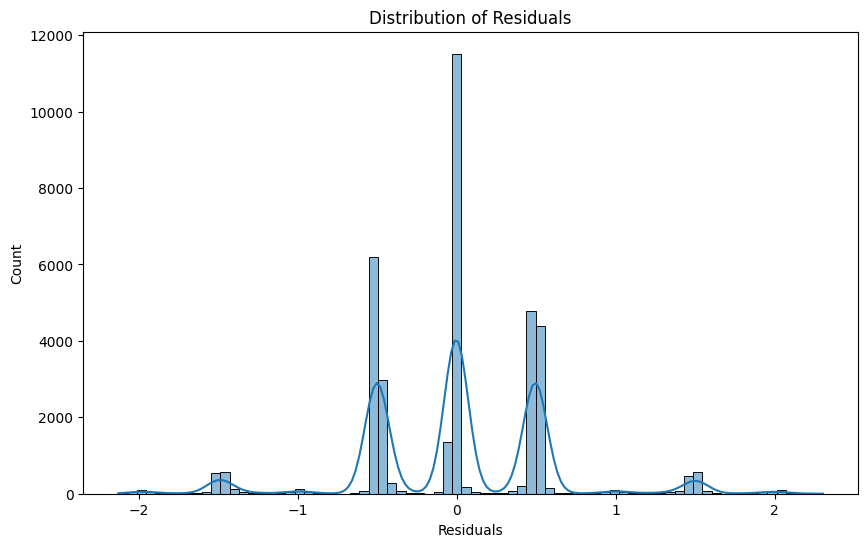

In [80]:
import seaborn as sns

# Calculate residuals
residuals = y_test_downtime - y_pred_downtime_xgb

# Plot residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_downtime_xgb, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


## Check for Normality

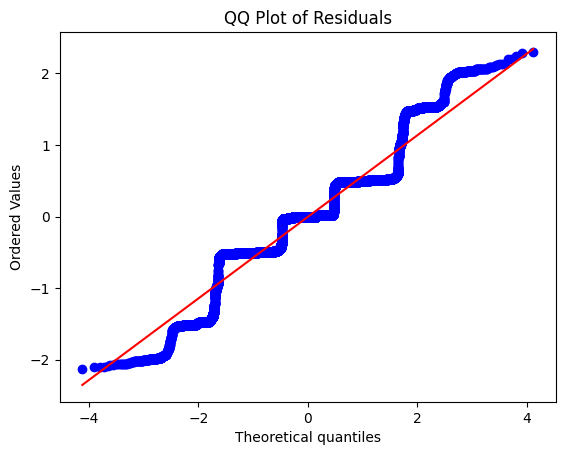

Shapiro-Wilk Test: Statistic=0.9100723643873814, p-value=3.6181098859070427e-87


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36103.
  res = hypotest_fun_out(*samples, **kwds)


In [81]:
from scipy import stats

# QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")
